In [1]:
!pip install -r requirements.txt

You should consider upgrading via the '/Users/macbook/opt/anaconda3/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
mnist = load_digits()

In [4]:
def plot_digits(images):
    fig = plt.figure(figsize=(15, 7))
    for i in range(10):
        sub_plot = fig.add_subplot(2, 5, i + 1)
        sub_plot.imshow(images[i], cmap=plt.cm.binary)
        sub_plot.set_title(f"Target {i}")

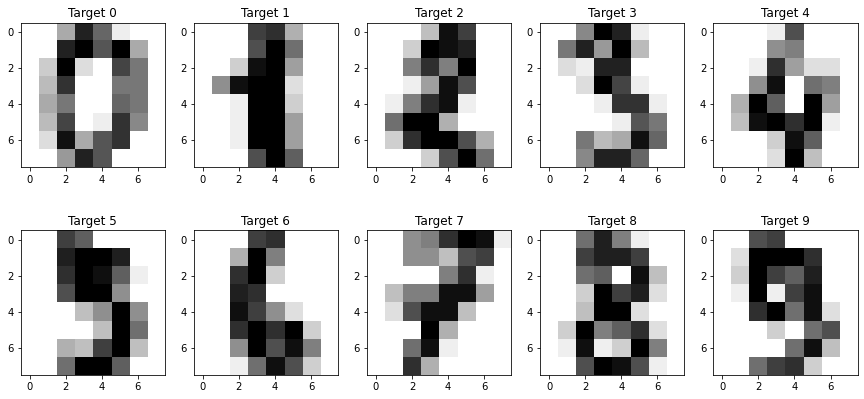

In [5]:
data = mnist.data
target = mnist.target
plot_digits(mnist.images)

In [6]:
def pca(X, n, max_variance=True):
    # Compute x average matrix
    # 2. Subtract mean B = X - Xbar
    # X /= np.std(X, axis=0)
    B = X - np.mean(X, axis=0)

    # 3. Compute the covariance matrix of rows of B:
    C = np.cov(B, rowvar=False)

    # 4. Compute the eigs of C
    v, w = np.linalg.eigh(C)

    if max_variance == False:
        indices = v.argsort()
    else:
        indices = v.argsort()[::-1]

    # sort the eigenvalues
    v = v[indices]
    # sort the eigenvectors corresponding to eigenvalues
    w = w[:, indices]

    return B.dot(w[:, :n])

In [7]:
n_components = 2
sklearn_PCA = PCA(n_components)
implemented_PCA_result = pca(data, n_components)

In [8]:
explained_variance = np.array([(implemented_PCA_result[:, i] ** 2).sum() / (n_components - 1) for i in range(n_components)])
total_var = ((data - data.mean(axis=0)) ** 2).sum() / (n_components - 1)
print("Explained Variance ratio: " + str(explained_variance / total_var))

Explained Variance ratio: [0.14890594 0.13618771]


In [11]:
sklearn_PCA_res = sklearn_PCA.fit_transform(data)

In [14]:
print("Explained Variance ratio sklearn: " + str(sklearn_PCA.explained_variance_ratio_))

Explained Variance ratio sklearn: [0.14890594 0.13618771]


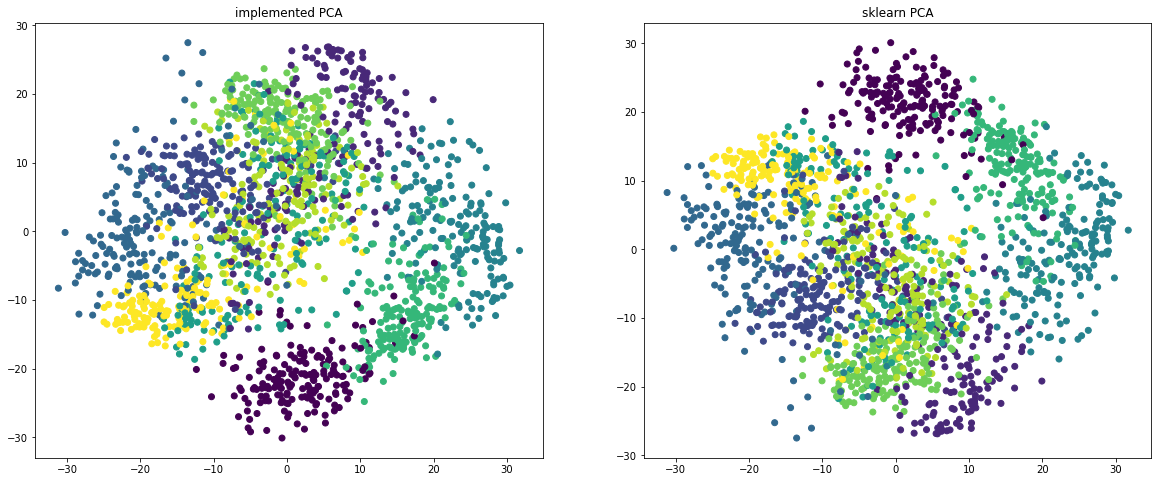

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].scatter(implemented_PCA_result[:, 0],
              implemented_PCA_result[:, 1], c = target)
ax[0].set_title("implemented PCA")
ax[1].scatter(sklearn_PCA_res[:, 0],
              sklearn_PCA_res[:, 1], c = target)
ax[1].set_title("sklearn PCA");